# APPM 4650 HW 1
## Soroush Khadem
Note that the handwritten pages are supplemental

In [44]:
import numpy as np
import math
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [15, 5]

## Problem 1

In [45]:
# Full written out form
def naive(x):
    return math.pow(x, 9) - 18*math.pow(x, 8) + 144*math.pow(x, 7) - 672*math.pow(x, 6) + 2016*math.pow(x, 5) - 4032*math.pow(x, 4) + 5376*math.pow(x, 3) - 4608*math.pow(x, 2) + 2304*x - 512


In [46]:
# Compact form
def p(x):
    return math.pow(x-2, 9)

In [47]:
# Horner's method
def horners(x):
    rv = np.poly([2]*9)[0]   
    for i in range(1, 10): 
        rv = rv*x + np.poly([2]*9)[i] 
    return rv 

In [48]:
# Built-in polyval
def polyval(x):
    return np.polyval(np.poly([2]*9), x)

In [49]:
# Evaluate near the roots
x = np.linspace(1.92, 2.08, 100)
naive_y = [naive(i) for i in x]
p_y = [p(i) for i in x]
horners_y = [horners(i) for i in x]
polyval_y = [polyval(i) for i in x]

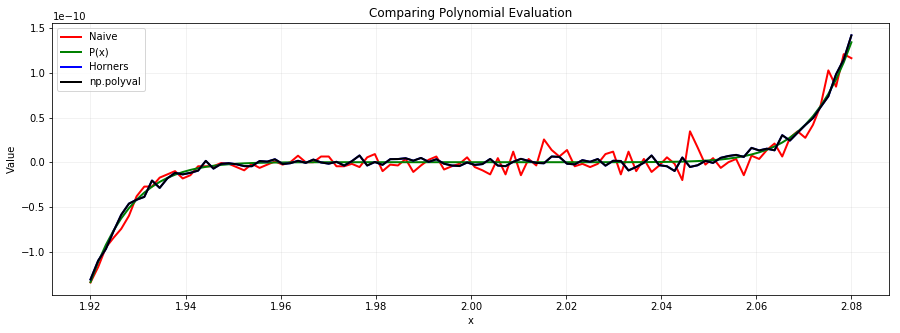

In [50]:
# Plot results
fig = plt.figure()
plt.plot(x, naive_y, 'r', linewidth=2)
plt.plot(x, p_y, 'g', linewidth=2)
plt.plot(x, horners_y, 'b', linewidth=2)
plt.plot(x, polyval_y, 'k', linewidth=2)
legend_text = ['Naive', 'P(x)', 'Horners', 'np.polyval']

plt.grid(True, alpha=0.2)
plt.title('Comparing Polynomial Evaluation')
plt.xlabel('x')
plt.ylabel('Value')
plt.legend(legend_text)

## Problem 3

Text(0,0.5,'Xn (log scale)')

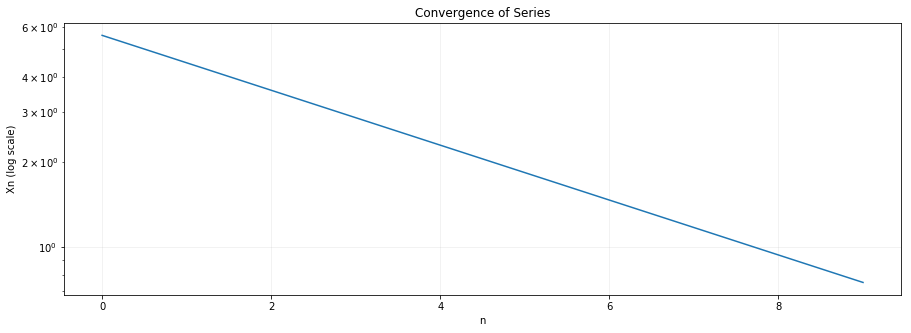

In [51]:
xn = [5.6, 4.48, 3.584, 2.8672, 2.2938, 1.8350, 1.4680, 1.1744, 0.9395, 0.7516]
plt.plot(xn)
plt.yscale('log')
plt.grid(True, alpha=0.2)
plt.title('Convergence of Series')
plt.xlabel('n')
plt.ylabel('Xn (log scale)')

In [52]:
xn[1] / xn[0]

0.8000000000000002

Text(0,0.5,'Xn (log scale)')

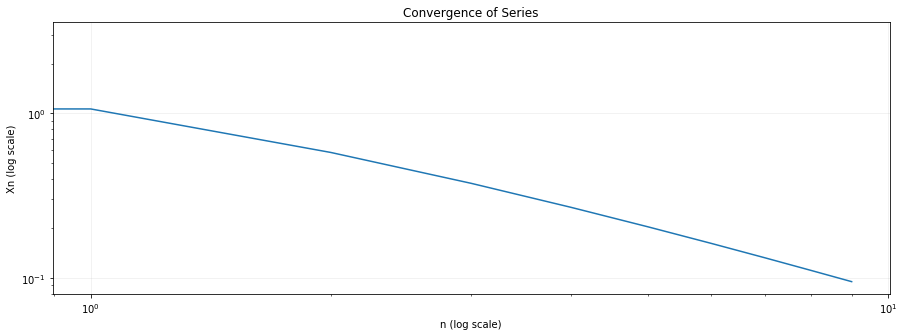

In [53]:
xn = [3, 1.0607, 0.5774, 0.3750, 0.2683, 0.2041, 0.1620, 0.1326, 0.1111, 0.0949]
plt.plot(xn)
plt.xscale('log')
plt.yscale('log')
plt.grid(True, alpha=0.2)
plt.title('Convergence of Series')
plt.xlabel('n (log scale)')
plt.ylabel('Xn (log scale)')

In [54]:
-math.log(xn[1]/xn[0])/math.log(2)

1.4999458272324424

## Problem 5

In [55]:
x_val = np.float64(9.999999995e-10)
trueAnswer = 1e-9
relAccuracy = lambda x : np.abs(x-trueAnswer)/np.abs(trueAnswer)
numDigits   = lambda x : -np.log10( relAccuracy(x) + 1e-18 )
f = lambda x : np.exp(x) - 1.0
numDigits(f(x_val))

7.082282536427183

In [56]:
condition = lambda x : np.abs((x/trueAnswer)*np.exp(x))
condition(x_val)

1.0000000005

In [57]:
# Bounding the error on the Taylor series: |Rn| < 2/(n+1)! * x^(n+1)
def find_n(n):
    return (2/math.factorial(n+1)) * (1e-9)**(n+1)

In [58]:
find_n(1)

1e-18

In [59]:
# Approximate using TS
def taylor(x):
    return x + (x**2 / 2)

In [60]:
numDigits(taylor(x_val))

18.0